### Logistic Regression
- Binary classification (eithr 0 or 1)
- uses sigmoid function to convert the linear combination of input features into a probability
- y_hat = sigmoid(wx + b)
- Sigmoid function is activation function.
- sigmoid(z) = 1 / (1 + e^(-z))
- the output of sigmoid function is in the range [0, 1]

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = "D:/Projects/TechAxis/class1/data/diabetes.csv"

In [3]:
df = pd.read_csv(data_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


In [4]:
df.duplicated().sum()

0

- No duplucate records are present

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

BloodPressue feature has 1 missing value

In [6]:
bp_median = df['BloodPressure'].median()
bp_median

72.0

In [7]:
df[df['BloodPressure'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139,NaN,0,0,27.1,1.441,57,0


In [8]:
df['BloodPressure'] = np.where(
    df['BloodPressure'].isna(), 
    bp_median, 
    df['BloodPressure']
)
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
5,5,116,74.0,0,0,25.6,0.201,30,0
6,3,78,50.0,32,88,31.0,0.248,26,1
7,10,115,0.0,0,0,35.3,0.134,29,0
8,2,197,70.0,45,543,30.5,0.158,53,1
9,8,125,96.0,0,0,0.0,0.232,54,1


In [9]:
df[df['BloodPressure'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### `TODO`: Outlier Identification and Handling 

In [10]:
# Independent and dependent feature split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [11]:
# train-test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=130)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=130)

In [14]:
y_pred_sk = lr_clf.predict(X_test)
y_pred_sk

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [15]:
pd.DataFrame({
    'y_test': y_test,
    'y_pred_sk': y_pred_sk
}).head(20)

,y_test,y_pred_sk
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
204,0,0
97,0,0
336,0,1
568,0,1
148,0,1


In [21]:
from sklearn.metrics import accuracy_score
# accuracy is a measure of how often the classifier is correct.
# acccuracy is calculated as the ratio of the number of correct predictions to the total number of predictions.
# accuracy = (total number of correct predictions) / (total number of predictions)
accuracy_score(y_test, y_pred_sk)

0.7467532467532467

#### Confusion matrix

In [17]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_sk)
mat

array([[78, 21],
       [18, 37]], dtype=int64)

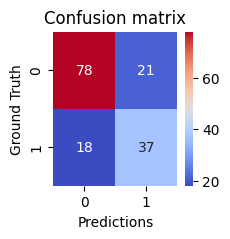

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(2, 2))
sns.heatmap(mat, annot=True, cmap='coolwarm')
plt.ylabel('Ground Truth')
plt.xlabel('Predictions')
plt.title('Confusion matrix')
plt.show()

In [19]:
78 + 21 + 18 + 37

154

In [20]:
(78 + 37) / (78 + 21 + 18 + 37)

0.7467532467532467

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: ', precision_score(y_test, y_pred_sk))
print('Recall: ', recall_score(y_test, y_pred_sk))
print('F1-Score: ', f1_score(y_test, y_pred_sk))

Precision:  0.6379310344827587
Recall:  0.6727272727272727
F1-Score:  0.6548672566371682
